In [1]:
# prompt: puedes describir el contenido de la carpeta "/content/drive/MyDrive/100JLCAM"

# Primero asegúrate de montar Google Drive si aún no lo has hecho
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/MyDrive/100JLCAM': No such file or directory


In [17]:
import os
import pandas as pd
#!pip install easyocr  openpyxl
!pip install pillow
!pip install opencv-python-headless


In [3]:
# prompt: inspeccionar la carpeta  /content/drive/MyDrive/100JLCAM
import os
# acá va la direccion de la carpeta. Es para verificar que puede ver los archivos
os.listdir("/content/drive/MyDrive/Clari imagenes 2")[0:5]

['DSCF0005.JPG',
 'DSCF0003.JPG',
 'DSCF0006.JPG',
 'DSCF0002.JPG',
 'DSCF0004.JPG',
 'DSCF0007.JPG',
 'DSCF0008.JPG',
 'DSCF0009.JPG',
 'DSCF0010.JPG',
 'DSCF0011.JPG',
 'DSCF0012.JPG',
 'DSCF0013.JPG',
 'DSCF0015.JPG',
 'DSCF0014.JPG',
 'DSCF0016.JPG',
 'DSCF0017.JPG',
 'DSCF0019.JPG',
 'DSCF0020.JPG',
 'DSCF0018.JPG',
 'DSCF0021.JPG',
 'DSCF0022.JPG',
 'DSCF0023.JPG',
 'DSCF0024.JPG',
 'DSCF0026.JPG',
 'DSCF0025.JPG',
 'DSCF0027.JPG',
 'DSCF0028.JPG',
 'DSCF0030.JPG',
 'DSCF0029.JPG',
 'DSCF0031.JPG',
 'DSCF0032.JPG',
 'DSCF0033.JPG',
 'DSCF0034.JPG',
 'DSCF0035.JPG',
 'DSCF0036.JPG',
 'DSCF0037.JPG',
 'DSCF0038.JPG',
 'DSCF0039.JPG',
 'DSCF0041.JPG',
 'DSCF0040.JPG',
 'DSCF0042.JPG',
 'DSCF0043.JPG',
 'DSCF0046.JPG',
 'DSCF0045.JPG',
 'DSCF0044.JPG',
 'DSCF0047.JPG',
 'DSCF0053.JPG',
 'DSCF0049.JPG',
 'DSCF0051.JPG',
 'DSCF0048.JPG',
 'DSCF0052.JPG',
 'DSCF0078.JPG',
 'DSCF0074.JPG',
 'DSCF0079.JPG',
 'DSCF0077.JPG',
 'DSCF0075.JPG',
 'DSCF0080.JPG',
 'DSCF0081.JPG',
 'DSCF0082.JPG

In [31]:
import easyocr
import pandas as pd
import re

def extraer_info_etiqueta(ruta_imagen):
    reader = easyocr.Reader(['en'], gpu=True)
    resultado = reader.readtext(ruta_imagen, detail=0)
    texto = " ".join(resultado)

    # Busca la fecha en los formatos día/mes/año, día-mes-año, día mes año
    patron_fecha = r'\b(\d{1,2})[\/\-\s](\d{1,2})[\/\-\s](\d{2,4})\b'
    busqueda = re.search(patron_fecha, texto)

    if busqueda:
        fecha = "/".join(busqueda.groups())
        texto_antes = texto[:busqueda.start()].strip()
        texto_despues = texto[busqueda.end():].strip()
    else:
        fecha = ""
        texto_antes = texto.strip()
        texto_despues = ""

    # Crea el DataFrame
    nombre_archivo = ruta_imagen.split("/")[-1]
    df = pd.DataFrame([{
        'archivo': nombre_archivo,
        'texto_antes_fecha': texto_antes,
        'fecha': fecha,
        'texto_despues_fecha': texto_despues
    }])
    return df

# Ejemplo de uso:
ruta = '/content/drive/MyDrive/Clari imagenes 2/DSCF0007.JPG'#'/content/drive/MyDrive/Clari imagenes 2/DSCF0007.jpg'
df = extraer_info_etiqueta(ruta)
df


,archivo,texto_antes_fecha,fecha,texto_despues_fecha
0,DSCF0007.JPG,5 - 20-25 IQ-HY- 02-62,,


In [34]:
import easyocr
import pandas as pd
import re

def extraer_info_etiqueta(ruta_imagen):
    reader = easyocr.Reader(['en'], gpu=True)
    resultado = reader.readtext(ruta_imagen, detail=0)
    texto = " ".join(resultado)

    # Expresión regular robusta: acepta /, -, espacios y combinaciones de ellos
    patron_fecha = r'\b(\d{1,2})\s*[-\/\s]+\s*(\d{1,2})\s*[-\/\s]+\s*(\d{2,4})\b'
    busqueda = re.search(patron_fecha, texto)

    if busqueda:
        fecha = "/".join(busqueda.groups())
        texto_antes = texto[:busqueda.start()].strip()
        texto_despues = texto[busqueda.end():].strip()
    else:
        fecha = ""
        texto_antes = texto.strip()
        texto_despues = ""

    nombre_archivo = ruta_imagen.split("/")[-1]
    df = pd.DataFrame([{
        'archivo': nombre_archivo,
        'texto_antes_fecha': texto_antes,
        'fecha': fecha,
        'texto_despues_fecha': texto_despues
    }])
    return df

# Ejemplo de uso:
ruta = '/content/drive/MyDrive/Clari imagenes 2/DSCF0009.JPG'
df = extraer_info_etiqueta(ruta)
df


,archivo,texto_antes_fecha,fecha,texto_despues_fecha
0,DSCF0009.JPG,,5/20/25,IQ-HY-02-62 ;


In [36]:
import easyocr
import pandas as pd
import re

def extraer_info_etiqueta(ruta_imagen, verbose=False):
    reader = easyocr.Reader(['en'], gpu=False)
    resultado = reader.readtext(ruta_imagen, detail=0)
    texto = " ".join(resultado)

    # LIMPIEZA extra (puedes agregar más reglas según lo que veas en tus resultados)
    texto = texto.replace("|", "1").replace("—", "-") # OCR suele confundir - y 1, o | y 1
    texto = re.sub(r' +', ' ', texto)  # reemplaza dobles espacios por uno solo
    texto = re.sub(r'(\d)\s*-\s*(\d)', r'\1-\2', texto)  # elimina espacios entre dígitos y guiones
    texto = re.sub(r'(\d)\s*/\s*(\d)', r'\1/\2', texto)  # elimina espacios entre dígitos y /
    texto = re.sub(r'(\d)\s+(\d)', r'\1 \2', texto)      # mantiene los espacios entre números separados
    if verbose:
        print(f"\nTexto OCR para {ruta_imagen}:\n{texto}\n")

    # Expresión robusta: permite - / y espacios mezclados, y tolera espacios extra
    patron_fecha = r'\b(\d{1,2})\s*[-\/\s]{1,2}\s*(\d{1,2})\s*[-\/\s]{1,2}\s*(\d{2,4})\b'
    busqueda = re.search(patron_fecha, texto)

    if busqueda:
        fecha = "/".join(busqueda.groups())
        texto_antes = texto[:busqueda.start()].strip()
        texto_despues = texto[busqueda.end():].strip()
    else:
        fecha = ""
        texto_antes = texto.strip()
        texto_despues = ""

    nombre_archivo = ruta_imagen.split("/")[-1]
    df = pd.DataFrame([{
        'archivo': nombre_archivo,
        'texto_antes_fecha': texto_antes,
        'fecha': fecha,
        'texto_despues_fecha': texto_despues
    }])
    return df
ruta_imagen = '/content/drive/MyDrive/Clari imagenes 2/DSCF0009.JPG'
df = extraer_info_etiqueta(ruta)
df


,archivo,texto_antes_fecha,fecha,texto_despues_fecha
0,DSCF0009.JPG,,5/20/25,IQ-HY-02-62 ;


# Función para extraer info de una imagen (recibe el reader como argumento)

In [1]:
import pandas as pd
import re
import os

def extraer_info_etiqueta(
    ruta_imagen: str,
    reader,
    verbose: bool = False
) -> pd.DataFrame:
    """
    Extrae información de la etiqueta de una imagen usando EasyOCR y devuelve un DataFrame con:
        - nombre del archivo,
        - texto anterior a la fecha,
        - fecha encontrada (día/mes/año, robusto a separadores y espacios),
        - texto posterior a la fecha,
        - confiabilidad promedio de la lectura OCR.

    Args:
        ruta_imagen (str): Ruta completa al archivo de imagen.
        reader (easyocr.Reader): Objeto EasyOCR ya inicializado.
        verbose (bool): Si es True, imprime el texto OCR reconocido.

    Returns:
        pd.DataFrame: Con columnas archivo, texto_antes_fecha, fecha, texto_despues_fecha, confianza_ocr
    """
    resultado = reader.readtext(ruta_imagen, detail=1)
    texto = " ".join([item[1] for item in resultado])
    confianza_ocr = round(100 * sum([item[2] for item in resultado]) / len(resultado), 1) if resultado else 0.0

    # Limpieza de texto OCR para mejorar robustez en fechas
    texto = texto.replace("|", "1").replace("—", "-")
    texto = re.sub(r' +', ' ', texto)
    texto = re.sub(r'(\d)\s*-\s*(\d)', r'\1-\2', texto)
    texto = re.sub(r'(\d)\s*/\s*(\d)', r'\1/\2', texto)
    texto = re.sub(r'(\d)\s+(\d)', r'\1 \2', texto)

    if verbose:
        print(f"\nTexto OCR para {os.path.basename(ruta_imagen)} (Confianza: {confianza_ocr}%):\n{texto}\n")

    # Regex robusto para fechas con -, /, espacio (mixtos)
    patron_fecha = r'\b(\d{1,2})\s*[-\/\s]{1,2}\s*(\d{1,2})\s*[-\/\s]{1,2}\s*(\d{2,4})\b'
    busqueda = re.search(patron_fecha, texto)
    if busqueda:
        fecha = "/".join(busqueda.groups())
        texto_antes = texto[:busqueda.start()].strip()
        texto_despues = texto[busqueda.end():].strip()
    else:
        fecha = ""
        texto_antes = texto.strip()
        texto_despues = ""

    nombre_archivo = os.path.basename(ruta_imagen)
    df = pd.DataFrame([{
        'archivo': nombre_archivo,
        'texto_antes_fecha': texto_antes,
        'fecha': fecha,
        'texto_despues_fecha': texto_despues,
        'confianza_ocr': confianza_ocr
    }])
    return df


# Función para procesar todas las imágenes de una carpeta (crea el reader una sola vez)

In [5]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [9]:
import easyocr
import glob

def procesar_imagenes_en_carpeta(
    carpeta: str,
    extensiones: tuple = ('*.JPG'),#, '*.jpg', '*.jpeg', '*.png'),
    verbose: bool = False
) -> pd.DataFrame:
    """
    Procesa todas las imágenes en una carpeta usando EasyOCR solo una vez, extrayendo la info de las etiquetas.

    Args:
        carpeta (str): Carpeta donde buscar imágenes.
        extensiones (tuple): Extensiones permitidas.
        verbose (bool): Si True, imprime texto OCR de cada imagen.

    Returns:
        pd.DataFrame: Con todas las lecturas de la carpeta.
    """
    reader = easyocr.Reader(['en'], gpu=False)

    # Buscar archivos con todas las extensiones
    lista_archivos = []
    for ext in extensiones:
        lista_archivos.extend(glob.glob(os.path.join(carpeta, ext)))
    if not lista_archivos:
        print("No se encontraron imágenes en la carpeta.")

    #return pd.DataFrame(columns=[
            #'archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])

    dfs = []
    for ruta in lista_archivos[60:70]:
        try:
            df = extraer_info_etiqueta(ruta, reader, verbose=verbose)
            dfs.append(df)
        except Exception as e:
            print(f"Error procesando {ruta}: {e}")
    if dfs:
        df_total = pd.concat(dfs, ignore_index=True)
    else:
        df_total = pd.DataFrame(
            columns=['archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])
    return df_total


# Llamado para procesar la carpeta y guardar a Excel

In [10]:
# Carpeta de imágenes
carpeta = '/content/drive/MyDrive/Clari imagenes 2/'

# Procesar (puedes poner verbose=True si quieres ver los OCR en consola)
df_final = procesar_imagenes_en_carpeta(carpeta, verbose=False)
#print(df_final)

# Guardar resultado como Excel
ruta_excel = os.path.join(carpeta, 'resultados_etiquetas.xlsx')
df_final.to_excel(ruta_excel, index=False)
print(f"\nArchivo Excel guardado en: {ruta_excel}")
df_final.head()


Archivo Excel guardado en: /content/drive/MyDrive/Clari imagenes 2/resultados_etiquetas.xlsx


,archivo,texto_antes_fecha,fecha,texto_despues_fecha,confianza_ocr
0,DSCF0085.JPG,"~Ok Cd AJ 0101 S[(sp2o2s GRASSLAUD Vile , NN'",,,38.2
1,DSCF0089.JPG,AhASSLANI ak Ct AJ NN slsls Wepk Vile < 0501,,,45.0
2,DSCF0087.JPG,Hs Rf 0303 Os/la/2$ ;,,,21.7
3,DSCF0086.JPG,Cd Aj 0104 (NN' 5145/2025,,,18.1
4,DSCF0088.JPG,HS Rf 03 03 os//9/2 $,,,41.2


### Aquí tienes el código completo y adaptado para Google Colab, incluyendo:

* Recorte automático de la zona de la etiqueta (franja inferior de la imagen).

* Normalización robusta de separadores (/, ', |, etc.).

* Procesamiento en lote, con la creación de un solo easyocr.Reader.

* Salida a Excel.

* Documentación clara.








In [21]:
import easyocr
import pandas as pd
import re
import os
import glob
from PIL import Image

import numpy as np
import cv2
from PIL import Image

def detectar_y_ocr_etiqueta(
    ruta_imagen: str,
    reader,
    verbose: bool = False
) -> pd.DataFrame:
    """
    Detecta automáticamente la etiqueta en cualquier lugar de la imagen usando OpenCV,
    recorta esa región y aplica EasyOCR.
    Retorna DataFrame con la info de la etiqueta.
    """
    try:
        # Leer imagen en formato OpenCV
        img_cv = cv2.imread(ruta_imagen)
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

        # Umbral para destacar regiones claras (puedes ajustar el valor si las etiquetas son muy beige)
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Encontrar contornos
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Seleccionar el contorno más grande que tenga proporciones de etiqueta
        best_cnt = None
        max_area = 0
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            area = w * h
            aspect = w / h if h > 0 else 0
            # Criterios: área razonable y forma rectangular
            if area > 1000 and 1.5 < aspect < 8:
                if area > max_area:
                    best_cnt = cnt
                    max_area = area

        if best_cnt is not None:
            x, y, w, h = cv2.boundingRect(best_cnt)
            etiqueta_crop = img_cv[y:y+h, x:x+w]
            etiqueta_array = etiqueta_crop
        else:
            # Si no encontró etiqueta clara, usa toda la imagen (fallback)
            etiqueta_array = img_cv
            if verbose:
                print(f"Advertencia: No se detectó etiqueta clara en {ruta_imagen}, usando imagen completa.")

        # OCR
        resultado = reader.readtext(etiqueta_array, detail=1)
        texto = " ".join([item[1] for item in resultado])
        confianza_ocr = round(100 * sum([item[2] for item in resultado]) / len(resultado), 1) if resultado else 0.0

        # Normalización y limpieza
        texto = texto.replace("|", "/").replace("’", "/").replace("‘", "/").replace("'", "/")
        texto = re.sub(r' +', ' ', texto)
        texto = re.sub(r'(\d)\s*[-\/]\s*(\d)', r'\1/\2', texto)
        texto = re.sub(r'(\d)\s+(\d)', r'\1 \2', texto)
        texto = texto.strip()

        if verbose:
            print(f"\nTexto OCR para {os.path.basename(ruta_imagen)} (Confianza: {confianza_ocr}%):\n{texto}\n")

        # Buscar fecha robustamente
        patron_fecha = r'\b(\d{1,2})[\/\-\s]{1,2}(\d{1,2})[\/\-\s]{1,2}(\d{2,4})\b'
        busqueda = re.search(patron_fecha, texto)
        if busqueda:
            fecha = "/".join(busqueda.groups())
            texto_antes = texto[:busqueda.start()].strip()
            texto_despues = texto[busqueda.end():].strip()
        else:
            fecha = ""
            texto_antes = texto.strip()
            texto_despues = ""

        nombre_archivo = os.path.basename(ruta_imagen)
        df = pd.DataFrame([{
            'archivo': nombre_archivo,
            'texto_antes_fecha': texto_antes,
            'fecha': fecha,
            'texto_despues_fecha': texto_despues,
            'confianza_ocr': confianza_ocr
        }])
        return df

    except Exception as e:
        print(f"Error procesando {ruta_imagen}: {e}")
        return pd.DataFrame(columns=['archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])


import numpy as np
"""
def extraer_info_etiqueta_con_recorte(
    ruta_imagen: str,
    reader,
    porc_altura_etiqueta=0.18,
    verbose: bool = False
) -> pd.DataFrame:

    try:
        # Recortar la etiqueta
        etiqueta_img = recortar_etiqueta(ruta_imagen, porc_altura=porc_altura_etiqueta)
        etiqueta_array = np.array(etiqueta_img)  # Convierte a array numpy

        resultado = reader.readtext(etiqueta_array, detail=1)
        texto = " ".join([item[1] for item in resultado])
        confianza_ocr = round(100 * sum([item[2] for item in resultado]) / len(resultado), 1) if resultado else 0.0

        # Normalización y limpieza de separadores
        texto = texto.replace("|", "/").replace("’", "/").replace("‘", "/").replace("'", "/")
        texto = re.sub(r' +', ' ', texto)
        texto = re.sub(r'(\d)\s*[-\/]\s*(\d)', r'\1/\2', texto)
        texto = re.sub(r'(\d)\s+(\d)', r'\1 \2', texto)
        texto = texto.strip()

        if verbose:
            print(f"\nTexto OCR para {os.path.basename(ruta_imagen)} (Confianza: {confianza_ocr}%):\n{texto}\n")

        # Buscar fecha robustamente
        patron_fecha = r'\b(\d{1,2})[\/\-\s]{1,2}(\d{1,2})[\/\-\s]{1,2}(\d{2,4})\b'
        busqueda = re.search(patron_fecha, texto)
        if busqueda:
            fecha = "/".join(busqueda.groups())
            texto_antes = texto[:busqueda.start()].strip()
            texto_despues = texto[busqueda.end():].strip()
        else:
            fecha = ""
            texto_antes = texto.strip()
            texto_despues = ""

        nombre_archivo = os.path.basename(ruta_imagen)
        df = pd.DataFrame([{
            'archivo': nombre_archivo,
            'texto_antes_fecha': texto_antes,
            'fecha': fecha,
            'texto_despues_fecha': texto_despues,
            'confianza_ocr': confianza_ocr
        }])
        return df
    except Exception as e:
        print(f"Error procesando {ruta_imagen}: {e}")
        return pd.DataFrame(columns=['archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])

"""
def procesar_imagenes_en_carpeta_con_recorte(
    carpeta: str,
    extensiones: tuple = ('*.JPG'),# '*.jpg', '*.jpeg', '*.png'),
    porc_altura_etiqueta: float = 0.18,
    verbose: bool = False
) -> pd.DataFrame:
    """
    Procesa todas las imágenes en una carpeta usando EasyOCR y recorte de la franja inferior para máxima precisión.
    Guarda todos los resultados en un DataFrame consolidado.
    """
    reader = easyocr.Reader(['en'], gpu=False)
    lista_archivos = []
    for ext in extensiones:
        lista_archivos.extend(glob.glob(os.path.join(carpeta, ext)))
    if not lista_archivos:
        print("No se encontraron imágenes en la carpeta.")
        return pd.DataFrame(
            columns=['archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])
    dfs = []
    for ruta in lista_archivos[80:90]:
        try:
            df = detectar_y_ocr_etiqueta(ruta, reader, verbose = False)
            dfs.append(df)
        except Exception as e:
            print(f"Error procesando {ruta}: {e}")
    if dfs:
        df_total = pd.concat(dfs, ignore_index=True)
    else:
        df_total = pd.DataFrame(
            columns=['archivo', 'texto_antes_fecha', 'fecha', 'texto_despues_fecha', 'confianza_ocr'])
    return df_total


In [16]:
# Define tu carpeta de imágenes (ajusta si es necesario)
carpeta = '/content/drive/MyDrive/Clari imagenes 2/'

# Procesa todas las imágenes con recorte automático (puedes ajustar porc_altura_etiqueta si tus etiquetas son más grandes o más chicas)
df_final = procesar_imagenes_en_carpeta_con_recorte(carpeta, porc_altura_etiqueta=0.18, verbose=False)
print(df_final)

# Guarda resultado como Excel
ruta_excel = os.path.join(carpeta, 'resultados_etiquetas.xlsx')
df_final.to_excel(ruta_excel, index=False)
print(f"\nArchivo Excel guardado en: {ruta_excel}")


Error procesando /content/drive/MyDrive/Clari imagenes 2/DSCF0106.JPG: image file is truncated (10 bytes not processed)
        archivo        texto_antes_fecha   fecha texto_despues_fecha  \
0  DSCF0118.JPG                                                        
1  DSCF0119.JPG                    Hs RF  0/2/02            os/IV/25   
2  DSCF0120.JPG                                                        
3  DSCF0121.JPG   IQ Mo 03 02 8 oshi9/25                               
4  DSCF0122.JPG                                                        
5  DSCF0123.JPG                 Jw CR 0/  0/3/05               /9/25   
6  DSCF0125.JPG                                                        
7  DSCF0126.JPG  AJ 0/03 NN oshs ) 25 CD                               
8  DSCF0124.JPG                                                        

   confianza_ocr  
0            0.0  
1           70.4  
2            0.0  
3           48.6  
4            0.0  
5           64.4  
6            0.0  
7      

/tmp/ipython-input-15-4186154728.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total = pd.concat(dfs, ignore_index=True)


Comentarios


1.  Uno de los errores es que tomaba solo una parte de la imagen para buscar la etiqueta. Debí indicarle que podía estar en cualquier lado.

2.  Otra fuente de error fue el formato de fecha. Si busca dia/mes/año, no encuentra ninguna. Debí indicarle que era mes/día/año, pudiendo separarse por / o - o espacio, solos o con espacios varios intercalados.

3. La ejecución local se complica porque lo la biblioteca que se instale debe ser compatible con el resto de la máquina, lo que a veces no ocurre y es difícil de solucionar. Este problema prácticamente no existe en Google Colab, y es probablemente la principal razón para preferirlo frente a otras opciones.

4. Google colab te permite seleccionar procesadores más veloces (GPU), según la siguiente imagen:

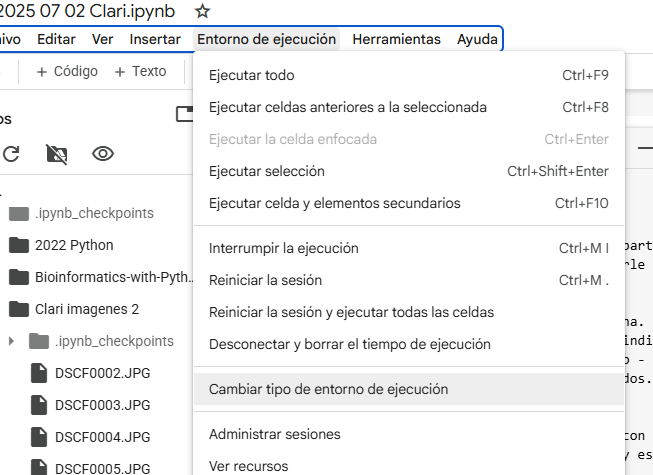

y seleccionar:

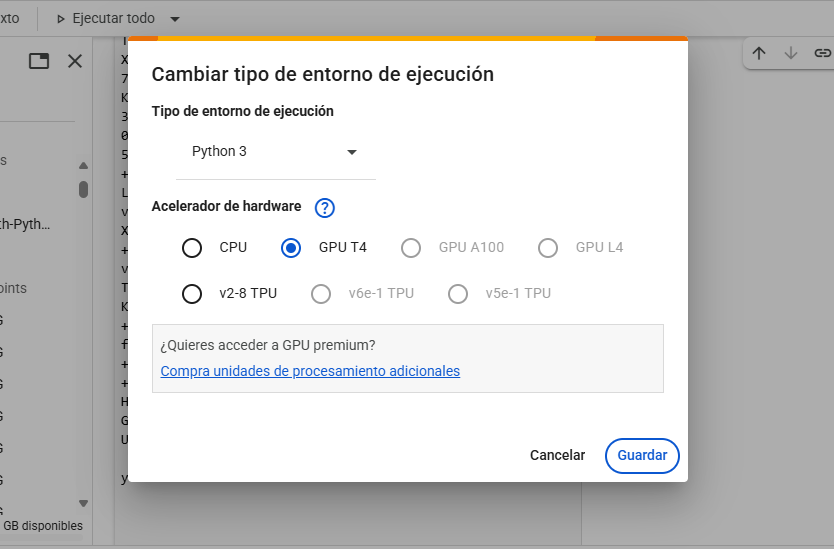

que en la versión gratuita suele ser de uso limitado.
La versión paga cuesta 9.99 por mes, aunque creo hay una opción pague por uso. Suele multiplicar la velocidad por 8 veces.

5. Otro problema fue la extensión del archivo. Buscaba .jpg y no encontraba ninguno. Debía buscar .JPG.





